# Pantheon+ likelihood Implementation

In this notebook we compare Pantheon, Pantheon+ and Pantheon+ & SH0ES likelihoods.

Author:
- Rodrigo Calderón

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from desilike.likelihoods.supernovae import PantheonPlusSHOESSNLikelihood, PantheonPlusSNLikelihood, PantheonSNLikelihood

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
from desilike.theories import Cosmoprimo
cosmo = Cosmoprimo(engine='camb')

## Set priors
cosmo.init.params = {'Omega_m': {'prior': {'limits': [0.1, 0.9]},
                          'ref': {'dist': 'norm', 'loc': 0.3, 'scale': 0.002},
                          'latex': '\Omega_m'},
                     'H0': {'prior': {'limits': [20, 100]},
                          'ref': {'dist': 'norm', 'loc': 67, 'scale': 0.5},
                          'latex': 'H_0'}
                     }

## Sampling

In [4]:
from desilike import setup_logging
from desilike.samplers import ZeusSampler

setup_logging()  # set up logging

likelihoods = {'Pantheon': PantheonSNLikelihood(cosmo=cosmo),
               'Pantheon+': PantheonPlusSNLikelihood(cosmo=cosmo),
               'Pantheon+ & SH0ES': PantheonPlusSHOESSNLikelihood(cosmo=cosmo)}
chains = {}
for name, likelihood in likelihoods.items():
    sampler = ZeusSampler(likelihood, save_fn=f'_tests/chain_{name}_*.npy', seed=42)
    sampler.run(check={'max_eigen_gr': 0.03, 'stable_over': 1})
    chains[name] = sampler.chains[0].remove_burnin(0.5)

[000000.01] [0/1] 12-02 12:03  PantheonSNLikelihood      INFO     Loading light-curve from /home/adematti/.local/data/PantheonSNLikelihood/lcparam_full_long.txt
[000000.02] [0/1] 12-02 12:03  PantheonSNLikelihood      INFO     Loading covariance from /home/adematti/.local/data/PantheonSNLikelihood/sys_full_long.txt
[000001.62] [0/1] 12-02 12:03  ZeusSampler               INFO     Varied parameters: ['Omega_m', 'H0', 'Mb'].
[000002.46] [0/1] 12-02 12:03  TaskManager               INFO     Entering TaskManager with 1 workers.
[000002.47] [0/1] 12-02 12:03  root                      INFO     Initialising ensemble of 8 walkers...
[000068.74] [0/1] 12-02 12:04  Chain                     INFO     Saving _tests/chain_Pantheon_0.npy.
[000068.74] [0/1] 12-02 12:04  ZeusSampler               INFO     Diagnostics:
[000068.76] [0/1] 12-02 12:04  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.648; not < 0.03.
[000068.78] [0/1] 12-02 12:04  ZeusSampler               INFO     - 

/home/adematti/anaconda3/envs/cosmodesi-main/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[000132.59] [0/1] 12-02 12:05  Chain                     INFO     Saving _tests/chain_Pantheon_0.npy.
[000132.60] [0/1] 12-02 12:05  ZeusSampler               INFO     Diagnostics:
[000132.62] [0/1] 12-02 12:05  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.404; not < 0.03.
[000132.63] [0/1] 12-02 12:05  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 is 0.0255.
[000133.16] [0/1] 12-02 12:05  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.237.
[000133.17] [0/1] 12-02 12:05  ZeusSampler               INFO     - max Geweke is 0.543.
[000133.17] [0/1] 12-02 12:05  ZeusSampler               INFO     - Geweke p-value is 0.63.
[000133.18] [0/1] 12-02 12:05  ZeusSampler               INFO     - (300 iterations / integrated autocorrelation time) is 10.8.
[000133.19] [0/1] 12-02 12:05  ZeusSampler               INFO     - max variation of integrated autocorrelation time is 0.506.
[000133.22] [0/1] 12-02 12:05  TaskManager 

[000455.25] [0/1] 12-02 12:11  ZeusSampler               INFO     Diagnostics:
[000455.26] [0/1] 12-02 12:11  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.566; not < 0.03.
[000455.28] [0/1] 12-02 12:11  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 is 0.0273.
[000455.33] [0/1] 12-02 12:11  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.526.
[000455.34] [0/1] 12-02 12:11  ZeusSampler               INFO     - max Geweke is 0.302.
[000455.34] [0/1] 12-02 12:11  ZeusSampler               INFO     - Geweke p-value is 0.677.
[000455.35] [0/1] 12-02 12:11  ZeusSampler               INFO     - (1350 iterations / integrated autocorrelation time) is 23.2.
[000455.35] [0/1] 12-02 12:11  ZeusSampler               INFO     - max variation of integrated autocorrelation time is 0.0313.
[000455.39] [0/1] 12-02 12:11  TaskManager               INFO     Entering TaskManager with 1 workers.
[000455.40] [0/1] 12-02 12:11  root    

[000734.38] [0/1] 12-02 12:15  root                      INFO     Initialising ensemble of 8 walkers...
[000784.30] [0/1] 12-02 12:16  Chain                     INFO     Saving _tests/chain_Pantheon+_0.npy.
[000784.31] [0/1] 12-02 12:16  ZeusSampler               INFO     Diagnostics:
[000784.32] [0/1] 12-02 12:16  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.274; not < 0.03.
[000784.33] [0/1] 12-02 12:16  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 is 0.0863.
[000784.86] [0/1] 12-02 12:16  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.861.
[000784.86] [0/1] 12-02 12:16  ZeusSampler               INFO     - max Geweke is 0.259.
[000784.87] [0/1] 12-02 12:16  ZeusSampler               INFO     - Geweke p-value is 0.203.
[000784.87] [0/1] 12-02 12:16  ZeusSampler               INFO     - (450 iterations / integrated autocorrelation time) is 10.8.
[000784.87] [0/1] 12-02 12:16  ZeusSampler               INFO   

[001139.53] [0/1] 12-02 12:22  Chain                     INFO     Saving _tests/chain_Pantheon+_0.npy.
[001139.54] [0/1] 12-02 12:22  ZeusSampler               INFO     Diagnostics:
[001139.55] [0/1] 12-02 12:22  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.966; not < 0.03.
[001139.56] [0/1] 12-02 12:22  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 is 0.0529.
[001139.60] [0/1] 12-02 12:22  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.651.
[001139.61] [0/1] 12-02 12:22  ZeusSampler               INFO     - max Geweke is 0.972.
[001139.61] [0/1] 12-02 12:22  ZeusSampler               INFO     - Geweke p-value is 0.114.
[001139.62] [0/1] 12-02 12:22  ZeusSampler               INFO     - (1500 iterations / integrated autocorrelation time) is 13.3.
[001139.62] [0/1] 12-02 12:22  ZeusSampler               INFO     - max variation of integrated autocorrelation time is 0.161.
[001139.69] [0/1] 12-02 12:22  TaskManag

[001486.39] [0/1] 12-02 12:28  TaskManager               INFO     Entering TaskManager with 1 workers.
[001486.40] [0/1] 12-02 12:28  root                      INFO     Initialising ensemble of 8 walkers...
[001533.84] [0/1] 12-02 12:29  Chain                     INFO     Saving _tests/chain_Pantheon+ & SH0ES_0.npy.
[001533.84] [0/1] 12-02 12:29  ZeusSampler               INFO     Diagnostics:
[001533.85] [0/1] 12-02 12:29  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.087; not < 0.03.
[001533.86] [0/1] 12-02 12:29  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 is 0.019.
[001534.25] [0/1] 12-02 12:29  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.118.
[001534.25] [0/1] 12-02 12:29  ZeusSampler               INFO     - max Geweke is 0.423.
[001534.25] [0/1] 12-02 12:29  ZeusSampler               INFO     - Geweke p-value is 0.126.
[001534.26] [0/1] 12-02 12:29  ZeusSampler               INFO     - (300 iteration

+---------+--------+--------+--------+-------+-----------------+-----------------+
|         | argmax |  mean  | median |  std  | quantile:1sigma | interval:1sigma |
+---------+--------+--------+--------+-------+-----------------+-----------------+
| Omega_m | 0.297  | 0.299  | 0.299  | 0.022 |  -0.022/+0.022  |  -0.023/+0.022  |
|   H0    |   54   |   75   |   74   |  15   |     -18/+18     |   -22.2/+9.8    |
|   Mb    | -19.90 | -19.25 | -19.24 | 0.43  |   -0.54/+0.52   |   -0.28/+0.68   |
+---------+--------+--------+--------+-------+-----------------+-----------------+


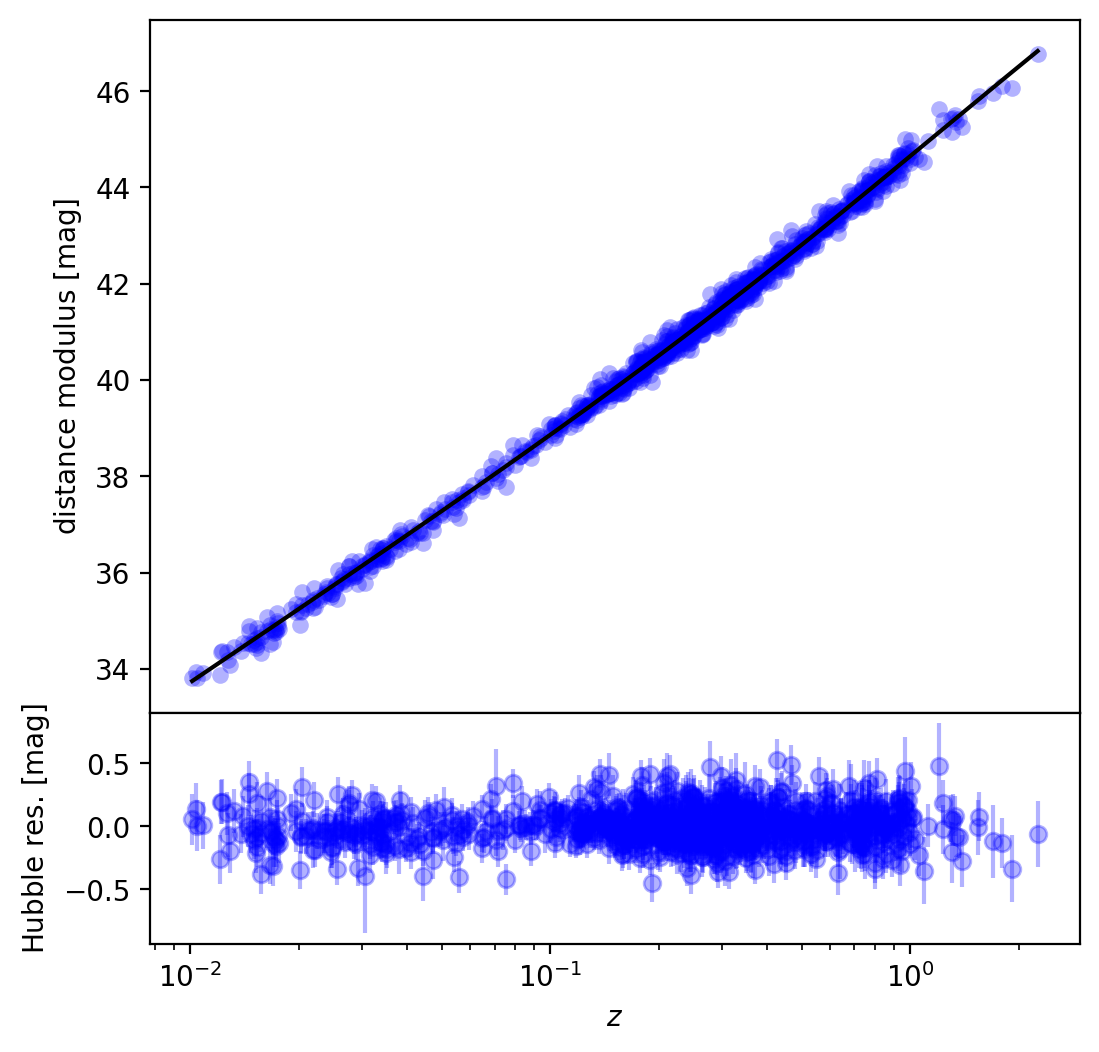

+---------+--------+--------+--------+-------+-----------------+-----------------+
|         | argmax |  mean  | median |  std  | quantile:1sigma | interval:1sigma |
+---------+--------+--------+--------+-------+-----------------+-----------------+
| Omega_m | 0.331  | 0.332  | 0.331  | 0.018 |  -0.018/+0.018  |  -0.018/+0.017  |
|   H0    |   92   |   76   |   75   |  15   |     -18/+18     |     -24/+11     |
|   Mb    | -18.76 | -19.23 | -19.20 | 0.44  |   -0.54/+0.51   |   -0.31/+0.65   |
+---------+--------+--------+--------+-------+-----------------+-----------------+


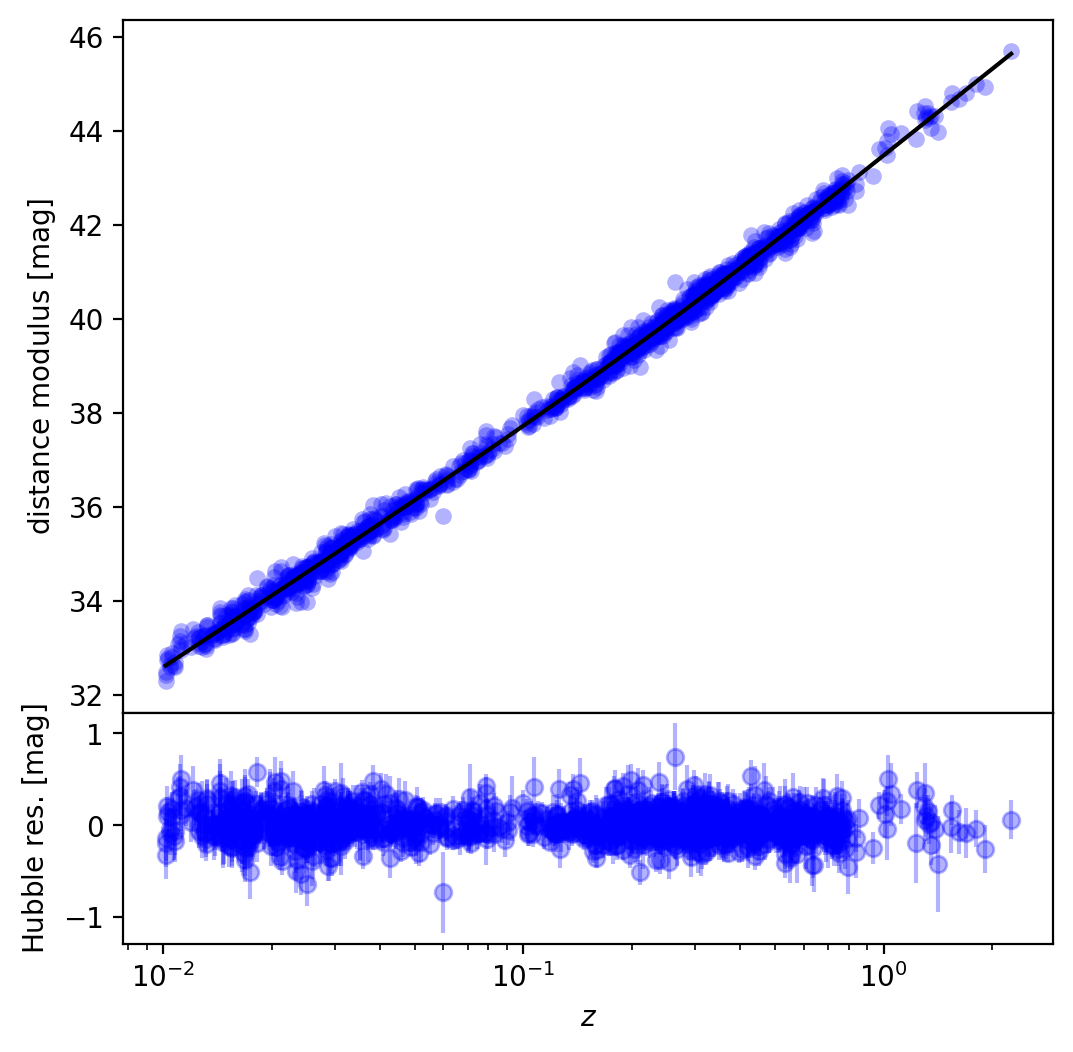

+---------+---------+---------+---------+-------+-----------------+-----------------+
|         | argmax  |  mean   | median  |  std  | quantile:1sigma | interval:1sigma |
+---------+---------+---------+---------+-------+-----------------+-----------------+
| Omega_m |  0.332  |  0.333  |  0.332  | 0.018 |  -0.018/+0.018  |  -0.018/+0.018  |
|   H0    |  73.50  |  73.50  |  73.49  | 0.98  |   -0.96/+0.95   |   -1.06/+0.83   |
|   Mb    | -19.245 | -19.245 | -19.245 | 0.029 |  -0.028/+0.028  |  -0.028/+0.027  |
+---------+---------+---------+---------+-------+-----------------+-----------------+


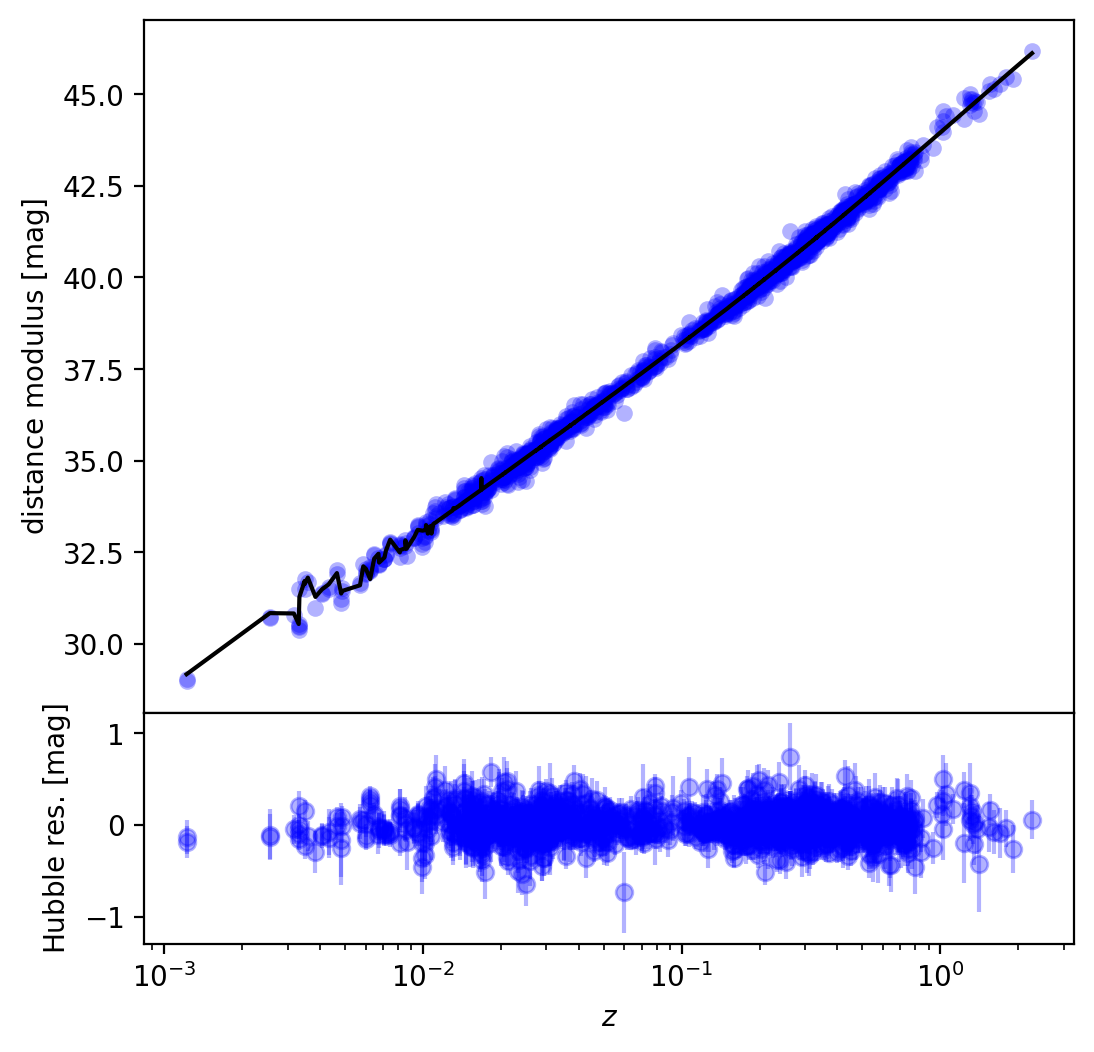

In [5]:
for name, likelihood in likelihoods.items():
    print(chains[name].to_stats(tablefmt='pretty'))
    likelihood(**chains[name].choice(index='argmax', input=True))
    likelihood.plot(show=True)

## Plotting

Let's load the precomputed chains (previous section).

Removed no burn in
Removed no burn in
Removed no burn in


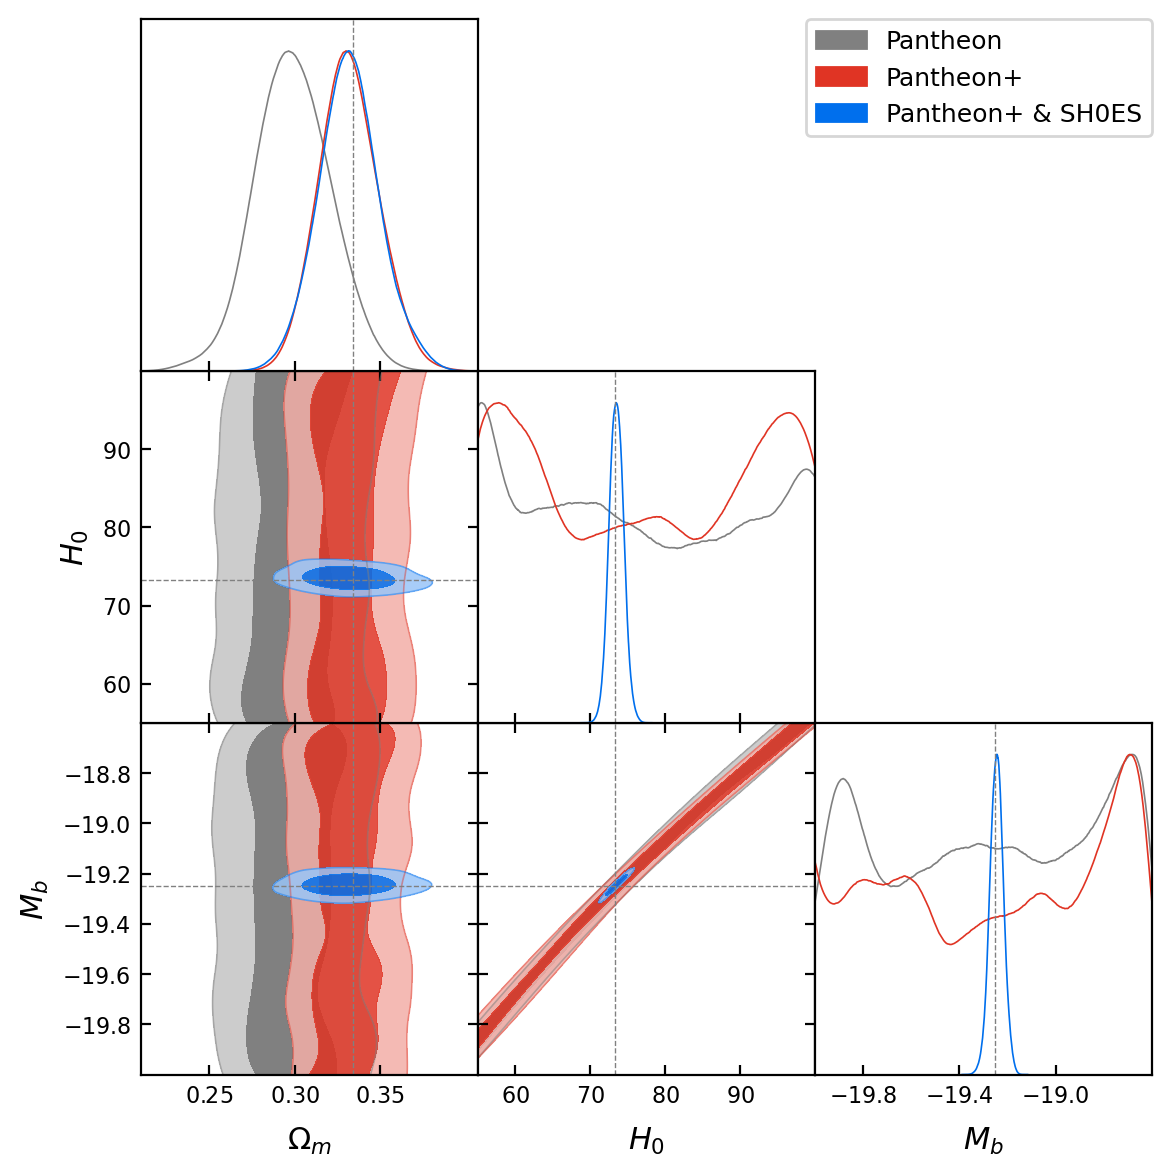

In [8]:
from desilike.samples import plotting

plotting.plot_triangle([chain[::10] for chain in chains.values()], labels=list(chains.keys()),
                       filled=True,
                       param_limits={'H0':[55., 100.],'Mb':[-20., -18.6]},
                       markers={'Mb': -19.25, 'H0': 73.3, 'Omega_m': 0.334},
                       show=True)